<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Investigacion_Operativa/Cadenas_de_Markov_R_Ej01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

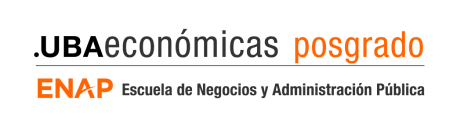

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Técnicas de Investigación Operativa para la Gestión - Cadenas de Markov

- María José BIANCO
- Verónica María GARCIA FRONTI
- Roberto Darío BACHINI

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


#### Ejercicio 01 - Frio Calor

#### Instalando paquetes

In [4]:
install.packages("markovchain")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("diagram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘shape’




#### Habilitando librerias

In [5]:
library(markovchain)
library(shape)
library(diagram)

Sea un modelo simple para predecir el tiempo el cual a partir de si hace calor o frío hoy se estima con qué probabilidad hará calor o frío mañana

In [9]:
estados <- c("Calor", "Frio")
MatrizTiempo <- matrix(c(0.60,0.40,
                        0.30,0.70),
                        byrow = T, ncol=2)

In [10]:
colnames(MatrizTiempo)=rownames(MatrizTiempo)=estados

Luego la matriz de transición es $P=\begin{pmatrix} 0.6 & 0.4 \\ 0.3 & 0.7\end{pmatrix} $ y se puede modelar con una cadena de Markov de dos estados...

#### Matriz de Transición

In [11]:
MatrizTiempo

,Calor,Frio
Calor,0.6,0.4
Frio,0.3,0.7


#### Objeto Markovchain

In [76]:
FrioCalor <- new("markovchain", transitionMatrix = MatrizTiempo)
FrioCalor

Unnamed Markov chain 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Calor, Frio 
 The transition matrix  (by rows)  is defined as follows: 
      Calor Frio
Calor   0.6  0.4
Frio    0.3  0.7


#### Diagrama de Transición

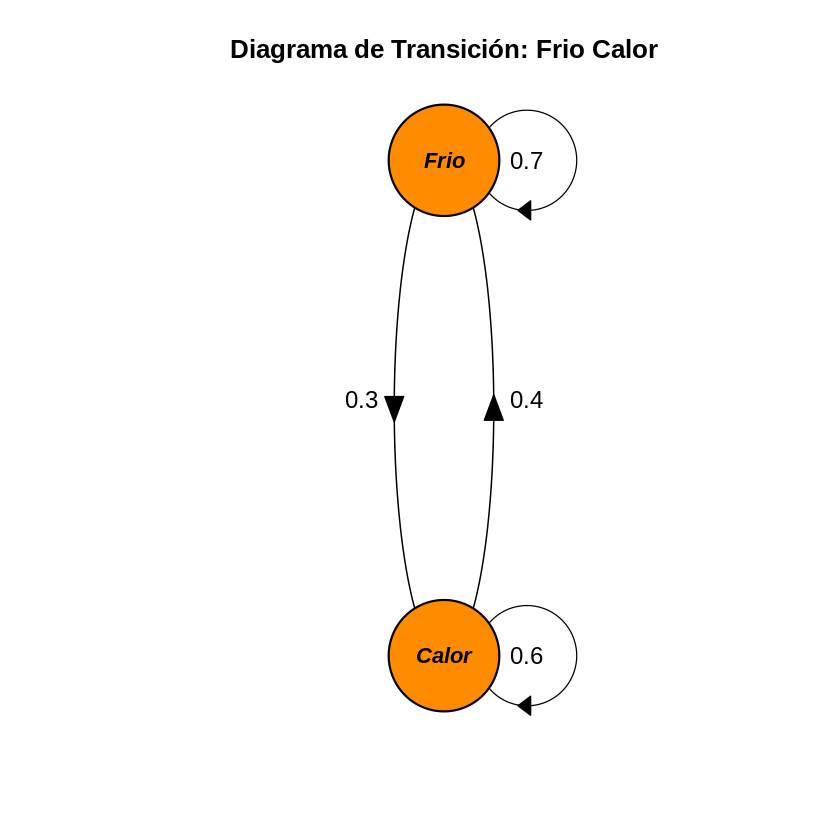

In [73]:
plotmat(t(FrioCalor@transitionMatrix),
        box.type = "circle", shadow.size = 0, txt.col = "black", txt.font = 4,
        box.lwd = 1.75, box.size = 0.08, box.col = "darkorange", box.cex = 1.1,
        arr.col = "black", arr.width = 0.3, arr.length = 0.4,
        arr.type ="triangle", arr.lwd = 1.2, arr.lcol = "black",
        cex.txt = 1.2, curve = 0.09,
        self.cex = 0.9,
        self.shiftx = c(0.12, 0.12),
        self.shifty = c(+0.00, +0.00),
        self.arrpos = c(1.5*pi, 1.5*pi, 0.5*pi),
        main = "Diagrama de Transición: Frio Calor", cex = 1.3)

#### Evolución en el tiempo de una cadena de Markov

Como se ha visto, la matriz de transiciones $P$ define la probabilidad de que la cadena pase del estado $s_i$ a otro estado $s_j$ en una unidad de tiempo.

$$P_{i,j}=P(\frac{X_{n+1}=s_j}{X_n=s_i})$$

Para realizar predicciones sobre el comportamiento de un sistema basta con calcular probabilidades condicionadas entre un instante $n$ y el siguiente $n+1$. Por ejemplo, la probabilidad de estar en $s_j$ en $n+2$ si se parte de $s_i$ en $n$ se puede expresar como:

$$P_{i,j}^{(2)}=P(\frac{X_{n+2}=s_j}{X_n=s_i})=\displaystyle\sum_{s_k} P_{kj} P_{ik} $$

#### Ejercicio 02 - Frio Calor

Sabiendo que hoy hace calor ¿Cómo se calcularía la probabilidad de que haga calor pasado mañana?

Es decir, esta información se puede resumir en la matriz de transición de dos pasos de la siguiente manera $P^{(2)}=P.P=P^2$

#### Matriz de transición de dos pasos

In [78]:
(PasadoMañana = FrioCalor^2)

Unnamed Markov chain^2 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Calor, Frio 
 The transition matrix  (by rows)  is defined as follows: 
      Calor Frio
Calor  0.48 0.52
Frio   0.39 0.61


Entonces la probabilidad de que pasado mañana haga calor sabiendo que hoy hace calor según la matriz de transición en dos pasos es 0.48. Es decir $P=0.48$

#### Ejercicio 03 - Frio Calor

Sabiendo que hoy hace calor ¿Cómo se calcularía la probabilidad de que haga frío pasado mañana?

La probabilidad de que pasado mañana haga frio sabiendo que hoy hace calor según la matriz de transición en dos pasos es 0.52. Es decir $1-P=0.52$

Generalizando, la probabilidad de estar en $s_j$ en $n+h$ si se parte de $s_i$ en $h$ se denomina la probabilidad de transición de $n$ pasos y se expresa como:

$$P_{i,j}^{(n)}=P(\frac{X_{n+h}=s_j}{X_h=s_i})=\displaystyle\sum_{s_k} P_{kj} P_{ik}^{n-1} =(P^n)_{ij} $$

La expresión anterior se conoce como la ecuación de Chapman- Kolmogorov